<a href="https://colab.research.google.com/github/Suriyakrishnansuriya/Cars_Model-Price_Prediction/blob/main/Cars_class_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project**

# **Title : Cars Price Prediction(Multiclass Classification Dataset)**

**In this project wanna go to predict the car model from given dataset.**

# **import necessory libraries**



In [959]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, KFold, GridSearchCV
from scipy import stats
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE, RandomOverSampler
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

In [960]:
# read the dataset 
data= pd.read_csv('cars_class.csv')

# **Explorary data analysis**

In [961]:
data.head()

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,1,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201,0
1,2,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203,3
2,3,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
3,4,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196,1
4,5,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196,2


In [962]:
# check how many unique values is present in tha dataset
print('unique_values :',data['Class'].unique())

print('number of unique_values :',data['Class'].nunique())

unique_values : [0 3 1 2]
number of unique_values : 4


In [963]:
# check whether null values in the data
data.isnull().sum()

ID              0
Comp            0
Circ            0
D.Circ          0
Rad.Ra          0
Pr.Axis.Ra      0
Max.L.Ra        0
Scat.Ra         0
Elong           0
Pr.Axis.Rect    0
Max.L.Rect      0
Sc.Var.Maxis    0
Sc.Var.maxis    0
Ra.Gyr          0
Skew.Maxis      0
Skew.maxis      0
Kurt.maxis      0
Kurt.Maxis      0
Holl.Ra         0
Class           0
dtype: int64

In [964]:
# check whether duplicates in the data
data.duplicated().sum()

0

In [965]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            719 non-null    int64
 1   Comp          719 non-null    int64
 2   Circ          719 non-null    int64
 3   D.Circ        719 non-null    int64
 4   Rad.Ra        719 non-null    int64
 5   Pr.Axis.Ra    719 non-null    int64
 6   Max.L.Ra      719 non-null    int64
 7   Scat.Ra       719 non-null    int64
 8   Elong         719 non-null    int64
 9   Pr.Axis.Rect  719 non-null    int64
 10  Max.L.Rect    719 non-null    int64
 11  Sc.Var.Maxis  719 non-null    int64
 12  Sc.Var.maxis  719 non-null    int64
 13  Ra.Gyr        719 non-null    int64
 14  Skew.Maxis    719 non-null    int64
 15  Skew.maxis    719 non-null    int64
 16  Kurt.maxis    719 non-null    int64
 17  Kurt.Maxis    719 non-null    int64
 18  Holl.Ra       719 non-null    int64
 19  Class         719 non-null   

In [966]:
data.columns

Index(['ID', 'Comp', 'Circ', 'D.Circ', 'Rad.Ra', 'Pr.Axis.Ra', 'Max.L.Ra',
       'Scat.Ra', 'Elong', 'Pr.Axis.Rect', 'Max.L.Rect', 'Sc.Var.Maxis',
       'Sc.Var.maxis', 'Ra.Gyr', 'Skew.Maxis', 'Skew.maxis', 'Kurt.maxis',
       'Kurt.Maxis', 'Holl.Ra', 'Class'],
      dtype='object')

In [967]:
# row and columns
data.shape

(719, 20)

**some outliers are there in this dataset**

> Indented block

> Indented block





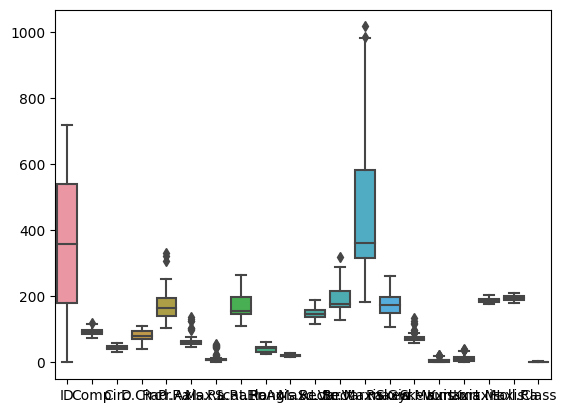

In [968]:
sns.boxplot(data)
plt.show()

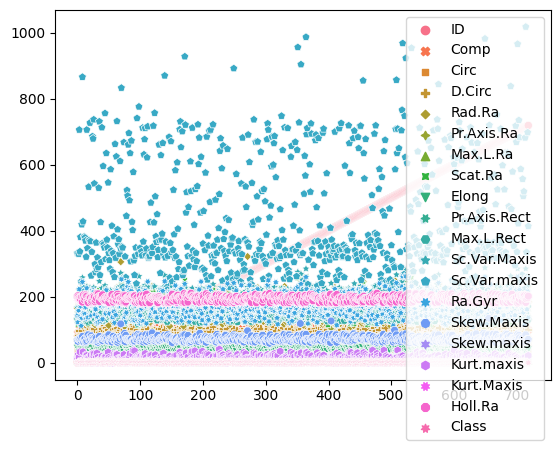

In [969]:
sns.scatterplot(data)
plt.show()

# **Remove the outliers in the data**

In [970]:
# add a columns 'zscore' in data
# remove outliers in the data using Zscore (-3 to 3) & some outliers are removed based on the Zscore

# for col in data.columns:
#   # data_od= data[(data[col]>=data[col].quantile(0.25))&(data[col]<=data[col].quantile(0.75))]
#   data['zscore']= stats.zscore(data[col])
#   data= data[(data['zscore']>=-3)&(data['zscore']<=3)]
# sns.boxplot(data)
# plt.show()

In [971]:
data.head()

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,1,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201,0
1,2,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203,3
2,3,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
3,4,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196,1
4,5,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196,2


In [972]:
data.shape


(719, 20)

# **Data cleaning & Preprocessing the data**

In [973]:
# drop ID columns beacause of this consist variance of 1, so this columns is not important
data.drop(['ID'], axis=1, inplace=True)
# data.drop(['zscore' ], axis=1, inplace=True)

In [974]:
# split the data into X and y 
X= data.iloc[:,0:-1]
y= data.iloc[:, -1]

In [975]:
# applying over sampling
smote= SMOTE()
X,y=smote.fit_resample(X,y)
X.shape

(756, 18)

In [976]:
y.shape

(756,)

In [977]:
# using Variance Threshold to check how much variance in features
vt= VarianceThreshold(threshold=0.5)
X_high_variance= vt.fit_transform(X)
X_high_variance

array([[ 88,  39,  70, ...,  13, 193, 201],
       [ 85,  35,  64, ...,  23, 196, 203],
       [ 91,  41,  84, ...,  14, 189, 199],
       ...,
       [ 89,  46,  83, ...,  19, 186, 197],
       [ 86,  38,  58, ...,   2, 185, 187],
       [ 90,  47,  78, ...,   9, 183, 192]])

In [978]:
vt.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [979]:
#apply StandardScaler to fit the data
ss= StandardScaler()
standard= ss.fit_transform(X)
standard

array([[-0.67214413, -0.94432668, -0.75949768, ...,  0.07184744,
         0.694108  ,  0.76630672],
       [-1.04286953, -1.59674703, -1.1470645 , ...,  1.22262425,
         1.19275766,  1.04436186],
       [-0.30141872, -0.6181165 ,  0.1448249 , ...,  0.18692512,
         0.0292418 ,  0.48825158],
       ...,
       [-0.54856899,  0.19740894,  0.08023043, ...,  0.76231352,
        -0.46940785,  0.21019644],
       [-0.9192944 , -1.10743177, -1.53463132, ..., -1.19400705,
        -0.6356244 , -1.18007925],
       [-0.42499385,  0.36051402, -0.24274192, ..., -0.38846328,
        -0.96805751, -0.4849414 ]])

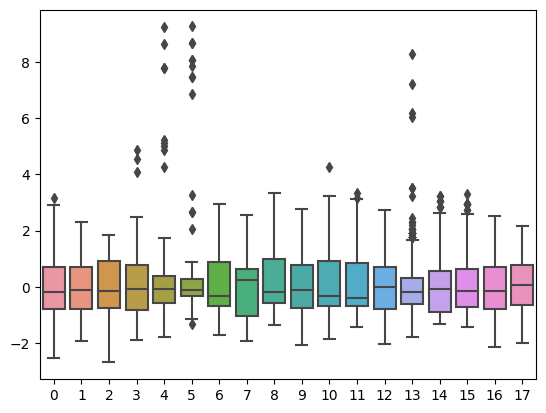

In [980]:
# to plot the boxplot to check the outliers in the data
# still some outliers are there after standardscaler
sns.boxplot(standard)
plt.show()

## Feature selection 

In [981]:
# apply PCA to find how much variance in all the features
pca= PCA(n_components=18)
pca_feature= pca.fit_transform(standard)
pca_feature

array([[-2.04298703e+00, -1.46930773e+00,  5.21438675e-01, ...,
         2.09467341e-02, -2.39355170e-02,  2.82073212e-02],
       [-4.73893368e+00, -2.34353618e+00, -2.39776679e-01, ...,
         2.36671745e-02,  4.08213378e-02, -4.81333868e-04],
       [-1.54216646e+00, -4.98822339e-01, -3.33586891e-01, ...,
        -2.80996559e-02,  4.68866587e-02,  2.47690344e-02],
       ...,
       [-2.72499561e-01,  1.59546949e-01,  5.16401626e-01, ...,
        -9.66868054e-02, -3.62515132e-02,  1.21382486e-02],
       [-4.78065129e+00,  1.11114723e+00, -6.83859032e-01, ...,
        -5.33105708e-02,  5.16547912e-02,  1.88401780e-02],
       [-5.52925296e-01,  1.30111031e+00, -1.26814587e-01, ...,
         1.73580355e-02, -4.05909550e-02, -8.73599843e-03]])

In [982]:
pca.explained_variance_

array([9.43318100e+00, 2.94626973e+00, 1.99888817e+00, 1.18717109e+00,
       9.19862430e-01, 5.18337725e-01, 3.42954654e-01, 2.28867049e-01,
       1.56605216e-01, 9.01312074e-02, 6.35339360e-02, 4.59805469e-02,
       3.51601882e-02, 2.15341837e-02, 1.59569847e-02, 1.25985672e-02,
       6.42326110e-03, 3.85122348e-04])

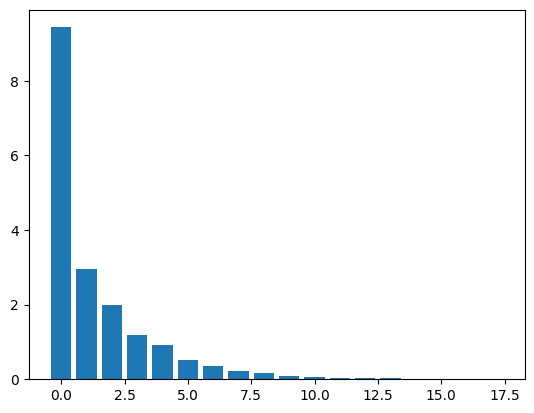

In [983]:
plt.bar(range(18), pca.explained_variance_)
plt.show()

In [984]:
pca.explained_variance_ratio_*100

array([5.23372403e+01, 1.63465141e+01, 1.10902452e+01, 6.58667085e+00,
       5.10358711e+00, 2.87584496e+00, 1.90278339e+00, 1.26980175e+00,
       8.68878146e-01, 5.00066590e-01, 3.52499424e-01, 2.55109589e-01,
       1.95076000e-01, 1.19476107e-01, 8.85326533e-02, 6.98994580e-02,
       3.56375818e-02, 2.13673849e-03])

In [985]:
np.cumsum(pca.explained_variance_ratio_*100)

array([ 52.33724026,  68.68375441,  79.77399964,  86.36067049,
        91.46425761,  94.34010257,  96.24288596,  97.51268771,
        98.38156586,  98.88163245,  99.23413187,  99.48924146,
        99.68431746,  99.80379357,  99.89232622,  99.96222568,
        99.99786326, 100.        ])

In [986]:
X.columns

Index(['Comp', 'Circ', 'D.Circ', 'Rad.Ra', 'Pr.Axis.Ra', 'Max.L.Ra', 'Scat.Ra',
       'Elong', 'Pr.Axis.Rect', 'Max.L.Rect', 'Sc.Var.Maxis', 'Sc.Var.maxis',
       'Ra.Gyr', 'Skew.Maxis', 'Skew.maxis', 'Kurt.maxis', 'Kurt.Maxis',
       'Holl.Ra'],
      dtype='object')

In [987]:
# remove the some columns from the dataset it will affect the test accuracy so that columns are not removed
X.drop(['Holl.Ra','Ra.Gyr', 'Skew.Maxis', 'Skew.maxis', 'Kurt.maxis', 'Kurt.Maxis'], axis=1, inplace=True)
X.columns

Index(['Comp', 'Circ', 'D.Circ', 'Rad.Ra', 'Pr.Axis.Ra', 'Max.L.Ra', 'Scat.Ra',
       'Elong', 'Pr.Axis.Rect', 'Max.L.Rect', 'Sc.Var.Maxis', 'Sc.Var.maxis'],
      dtype='object')

In [988]:
X.shape

(756, 12)

In [989]:
y.shape

(756,)

In [990]:
y

0      0
1      3
2      3
3      1
4      2
      ..
751    3
752    3
753    3
754    3
755    3
Name: Class, Length: 756, dtype: int64

# **check the data whether is imbalance or not**

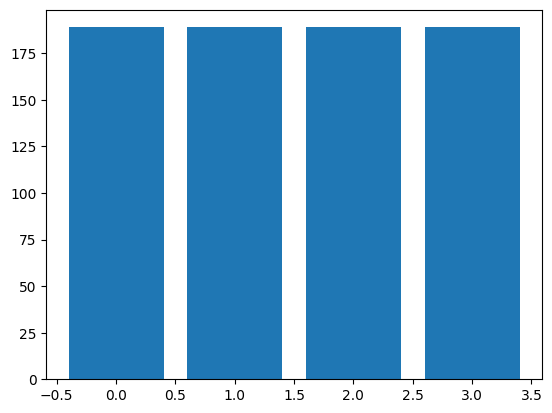

In [991]:
# bar plot , this is balanced dataset
plt.bar(range(4), y.value_counts())
plt.show()

# **Split the data to train and test dataset for Evaluvation**

In [992]:
# to split the data into train & test data(20%)
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2,random_state=19)
X_test.shape

(152, 12)

In [993]:
y_test.shape

(152,)

# **Implement StandardScaler**

In [994]:
# apply Scaling
X_train= ss.fit_transform(X_train)
X_test= ss.transform(X_test)

[]

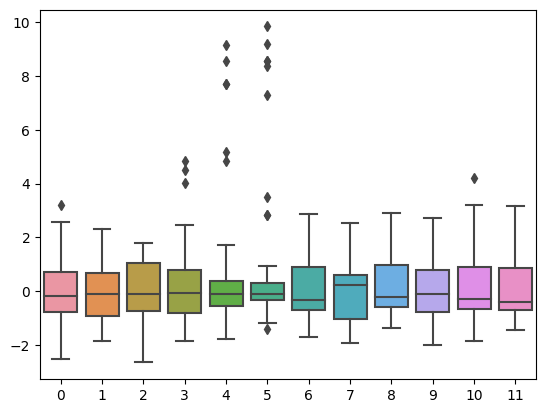

In [995]:
sns.boxplot(X_train)
plt.plot()

# **Cross Validation(Kfold cross validation)**

In [1106]:
# apply Randomforest Classifier to cross validation
rf= RandomForestClassifier()
kf= KFold(n_splits=5)
scores= cross_val_score(rf, X_train,y_train, cv=kf)
print('cross validation score {}'.format(scores))
print('Average of cross validation score :{}'.format(scores.mean()))

cross validation score [0.73553719 0.76033058 0.67768595 0.7107438  0.75      ]
Average of cross validation score :0.7268595041322314


# **Evaluvation**
# **Predict the Cars Model Applying diffrents classification moduls**

# **#Logistic Regression**

In [1054]:
# LogisticRegression
lr= LogisticRegression()
lr.fit(X_train, y_train)
lr_train_predict= lr.predict(X_train)
lr_test_predict= lr.predict(X_test)

In [1055]:
print('Logistic_Regression')
print('accuracy_score of train_data :', accuracy_score(y_train, lr_train_predict))
print('accuracy_score of test_data :', accuracy_score(y_test, lr_test_predict))


Logistic_Regression
accuracy_score of train_data : 0.7731788079470199
accuracy_score of test_data : 0.743421052631579


In [1058]:
print('confusion_matrix of train_data :\n',confusion_matrix(y_train, lr_train_predict))
print('confusion_matrix of test_data :\n',confusion_matrix(y_test, lr_test_predict))
print('---------------------------------------------------------------------')
print('f1_score for train_data :', f1_score(y_train, lr_train_predict, average='weighted'))
print('f1_score for test_data :', f1_score(y_test, lr_test_predict, average='weighted'))

confusion_matrix of train_data :
 [[141   1   1   4]
 [  8  88  48  10]
 [ 12  41  95   7]
 [  2   1   2 143]]
confusion_matrix of test_data :
 [[37  0  2  3]
 [ 2 21 11  1]
 [ 3 15 16  0]
 [ 1  0  1 39]]
---------------------------------------------------------------------
f1_score for train_data : 0.7654495583762495
f1_score for test_data : 0.7390813145124617


---------train data---------


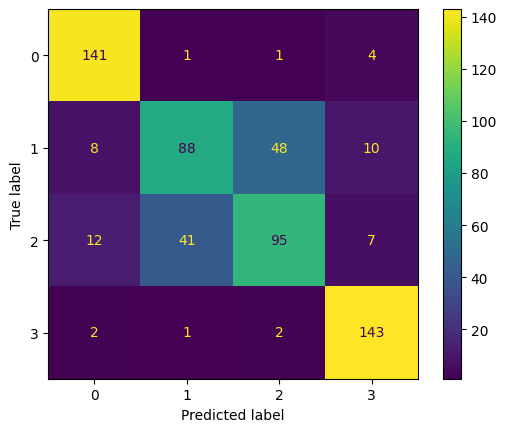

In [1059]:
print('---------train data---------')
cm_train= confusion_matrix(y_train, lr_train_predict, labels=lr.classes_)
cm_test= confusion_matrix(y_test, lr_test_predict, labels=lr.classes_)
disp= ConfusionMatrixDisplay(cm_train, display_labels=lr.classes_)
disp.plot()
plt.show()

---------test data---------


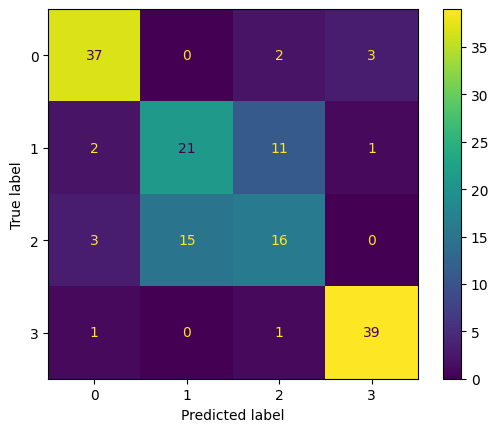

In [1060]:
print('---------test data---------')
disp= ConfusionMatrixDisplay(cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

# **#RandomForest Classifier**

In [1061]:
# RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_train_predict= rfc.predict(X_train)
rfc_test_predict= rfc.predict(X_test)

In [1062]:
print('RandomForest Classifier')
print('accuracy_score of train_data :', accuracy_score(y_train, rfc_train_predict))
print('accuracy_score of test_data :', accuracy_score(y_test, rfc_test_predict))

RandomForest Classifier
accuracy_score of train_data : 1.0
accuracy_score of test_data : 0.8157894736842105


In [1063]:
print('confusion_matrix of train_data :\n',confusion_matrix(y_train, rfc_train_predict))
print('confusion_matrix of test_data :\n',confusion_matrix(y_test, rfc_test_predict))
print('---------------------------------------------------------------------')
print('f1_score for train_data :', f1_score(y_train, rfc_train_predict, average='weighted'))
print('f1_score for test_data :', f1_score(y_test, rfc_test_predict, average='weighted'))

confusion_matrix of train_data :
 [[147   0   0   0]
 [  0 154   0   0]
 [  0   0 155   0]
 [  0   0   0 148]]
confusion_matrix of test_data :
 [[42  0  0  0]
 [ 1 19 14  1]
 [ 0 11 23  0]
 [ 1  0  0 40]]
---------------------------------------------------------------------
f1_score for train_data : 1.0
f1_score for test_data : 0.812585284799845


---------train data---------


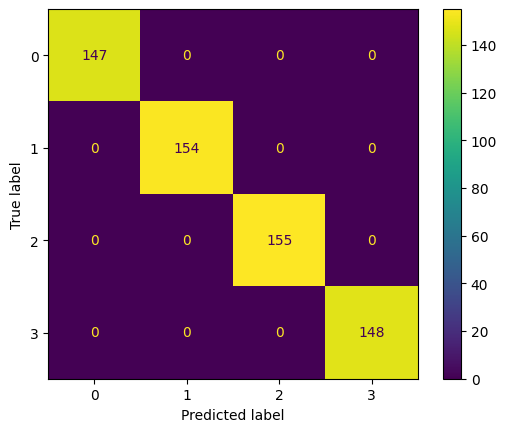

In [1064]:
print('---------train data---------')
cm_train= confusion_matrix(y_train, rfc_train_predict, labels=rfc.classes_)
cm_test= confusion_matrix(y_test, rfc_test_predict, labels=rfc.classes_)
disp= ConfusionMatrixDisplay(cm_train, display_labels=rfc.classes_)
disp.plot()
plt.show()

---------test data---------


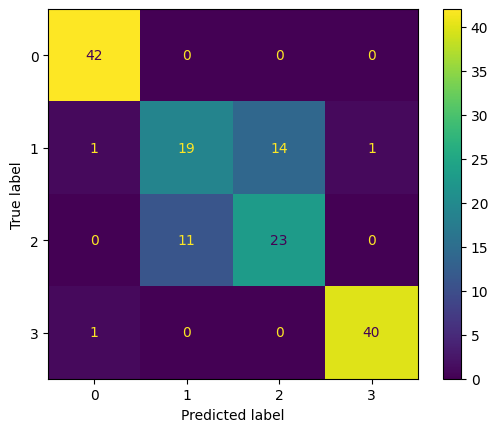

In [1065]:
print('---------test data---------')
disp= ConfusionMatrixDisplay(cm_test, display_labels=rfc.classes_)
disp.plot()
plt.show()

# **#DecisionTree Classifier**

In [1066]:
# DecisionTree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_train_predict= dtc.predict(X_train)
dtc_test_predict= dtc.predict(X_test)

In [1067]:
print('DecisionTree Classifier')
print('accuracy_score of train_data :', accuracy_score(y_train, dtc_train_predict))
print('accuracy_score of test_data :', accuracy_score(y_test, dtc_test_predict))

DecisionTree Classifier
accuracy_score of train_data : 1.0
accuracy_score of test_data : 0.743421052631579


In [1068]:
print('confusion_matrix of train_data :\n',confusion_matrix(y_train, dtc_train_predict))
print('confusion_matrix of test_data :\n',confusion_matrix(y_test, dtc_test_predict))
print('---------------------------------------------------------------------')
print('f1_score for train_data :', f1_score(y_train, dtc_train_predict, average='weighted'))
print('f1_score for test_data :', f1_score(y_test, dtc_test_predict, average='weighted'))

confusion_matrix of train_data :
 [[147   0   0   0]
 [  0 154   0   0]
 [  0   0 155   0]
 [  0   0   0 148]]
confusion_matrix of test_data :
 [[39  1  0  2]
 [ 1 19 14  1]
 [ 0 17 17  0]
 [ 1  1  1 38]]
---------------------------------------------------------------------
f1_score for train_data : 1.0
f1_score for test_data : 0.7447645336540498


---------train data---------


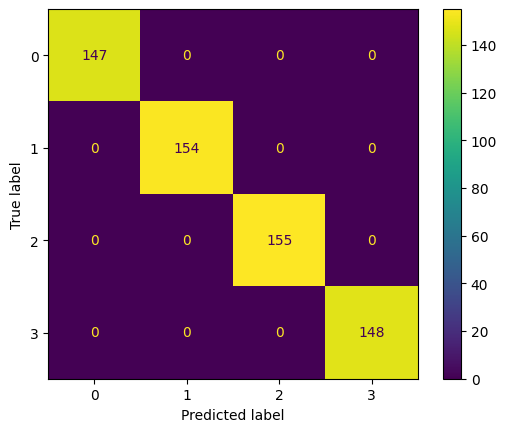

In [1069]:
print('---------train data---------')
cm_train= confusion_matrix(y_train, dtc_train_predict, labels=dtc.classes_)
cm_test= confusion_matrix(y_test, dtc_test_predict, labels=dtc.classes_)
disp= ConfusionMatrixDisplay(cm_train, display_labels=dtc.classes_)
disp.plot()
plt.show()

---------test data---------


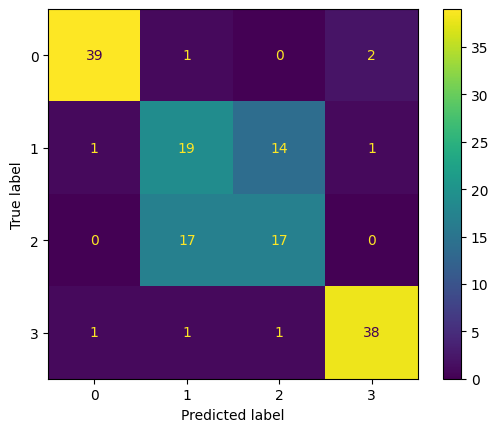

In [1070]:
print('---------test data---------')
disp= ConfusionMatrixDisplay(cm_test, display_labels=dtc.classes_)
disp.plot()
plt.show()

# **#KNeighbors Classifier**

In [1071]:
# KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_train_predict= knn.predict(X_train)
knn_test_predict= knn.predict(X_test)

In [1072]:
print('KNeighbors Classifier')
print('accuracy_score of train_data :', accuracy_score(y_train, knn_train_predict))
print('accuracy_score of test_data :', accuracy_score(y_test, knn_test_predict))

KNeighbors Classifier
accuracy_score of train_data : 0.8162251655629139
accuracy_score of test_data : 0.7960526315789473


In [1073]:
print('confusion_matrix of train_data :\n',confusion_matrix(y_train, knn_train_predict))
print('confusion_matrix of test_data :\n',confusion_matrix(y_test, knn_test_predict))
print('---------------------------------------------------------------------')
print('f1_score for train_data :', f1_score(y_train, knn_train_predict, average='weighted'))
print('f1_score for test_data :', f1_score(y_test, knn_test_predict, average='weighted'))

confusion_matrix of train_data :
 [[142   2   0   3]
 [  2 100  49   3]
 [  4  37 109   5]
 [  2   3   1 142]]
confusion_matrix of test_data :
 [[38  1  0  3]
 [ 1 23 11  0]
 [ 2 11 21  0]
 [ 1  0  1 39]]
---------------------------------------------------------------------
f1_score for train_data : 0.814358231127736
f1_score for test_data : 0.7950233770904513


---------train data---------


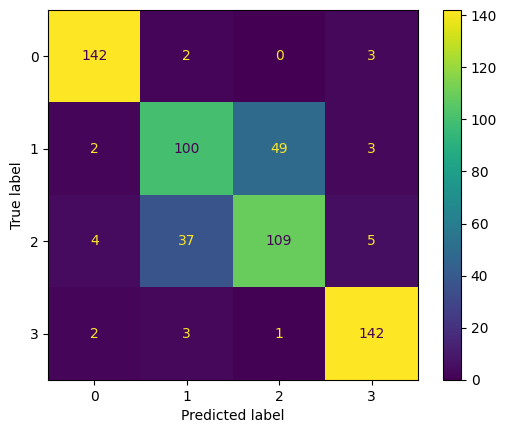

In [1074]:
print('---------train data---------')
cm_train= confusion_matrix(y_train, knn_train_predict, labels=knn.classes_)
cm_test= confusion_matrix(y_test, knn_test_predict, labels=knn.classes_)
disp= ConfusionMatrixDisplay(cm_train, display_labels=knn.classes_)
disp.plot()
plt.show()

---------test data---------


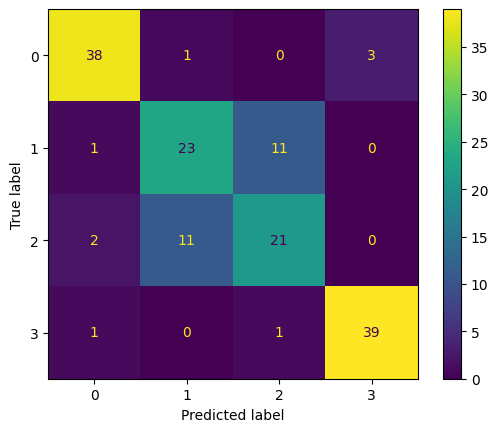

In [1075]:
print('---------test data---------')
disp= ConfusionMatrixDisplay(cm_test, display_labels=knn.classes_)
disp.plot()
plt.show()

# **SVC**

In [1076]:
# SVC
svc= SVC()
svc.fit(X_train, y_train)
svc_train_predict= svc.predict(X_train)
svc_test_predict= svc.predict(X_test)

In [1077]:
print('SVC')
print('accuracy_score of train_data :', accuracy_score(y_train, svc_train_predict))
print('accuracy_score of test_data :', accuracy_score(y_test, svc_test_predict))

SVC
accuracy_score of train_data : 0.7864238410596026
accuracy_score of test_data : 0.7960526315789473


In [1078]:
print('confusion_matrix of train_data :\n',confusion_matrix(y_train, svc_train_predict))
print('confusion_matrix of test_data :\n',confusion_matrix(y_test, svc_test_predict))
print('---------------------------------------------------------------------')
print('f1_score for train_data :', f1_score(y_train, svc_train_predict, average='weighted'))
print('f1_score for test_data :', f1_score(y_test, svc_test_predict, average='weighted'))

confusion_matrix of train_data :
 [[143   0   1   3]
 [  4  71  69  10]
 [  3  24 117  11]
 [  1   2   1 144]]
confusion_matrix of test_data :
 [[38  0  1  3]
 [ 0 16 18  1]
 [ 1  6 27  0]
 [ 1  0  0 40]]
---------------------------------------------------------------------
f1_score for train_data : 0.7762145017739247
f1_score for test_data : 0.7902249169041307


---------train data---------


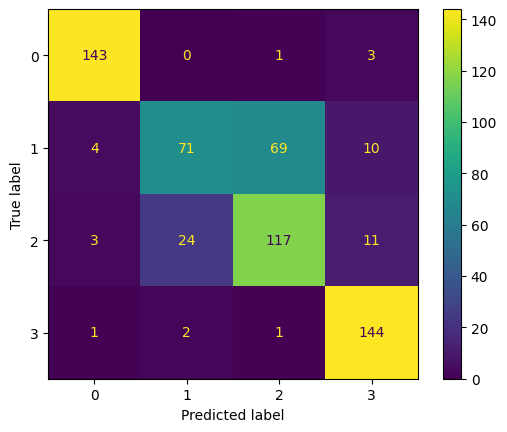

In [1079]:
print('---------train data---------')
cm_train= confusion_matrix(y_train, svc_train_predict, labels=svc.classes_)
cm_test= confusion_matrix(y_test, svc_test_predict, labels=svc.classes_)
disp= ConfusionMatrixDisplay(cm_train, display_labels=svc.classes_)
disp.plot()
plt.show()

---------test data---------


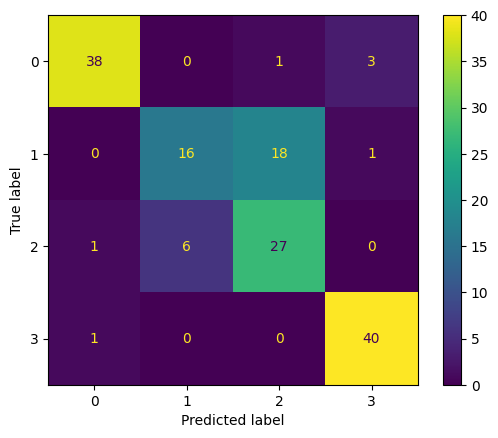

In [1080]:
print('---------test data---------')
disp= ConfusionMatrixDisplay(cm_test, display_labels=svc.classes_)
disp.plot()
plt.show()

# **XGB Classifier**

In [1081]:
# XGB Classifier

xgb= XGBClassifier()
xgb.fit(X_train, y_train)
xgb_train_predict= xgb.predict(X_train)
xgb_test_predict= xgb.predict(X_test)

In [1082]:
print('XGB Classifier')
print('accuracy_score of train_data :', accuracy_score(y_train, xgb_train_predict))
print('accuracy_score of test_data :', accuracy_score(y_test, xgb_test_predict))

XGB Classifier
accuracy_score of train_data : 1.0
accuracy_score of test_data : 0.8421052631578947


In [1084]:
print('confusion_matrix of train_data :\n',confusion_matrix(y_train, xgb_train_predict))
print('confusion_matrix of test_data :\n',confusion_matrix(y_test, xgb_test_predict))
print('---------------------------------------------------------------------')
print('f1_score for train_data :', f1_score(y_train, xgb_train_predict, average='weighted'))
print('f1_score for test_data :', f1_score(y_test, xgb_test_predict, average='weighted'))

confusion_matrix of train_data :
 [[147   0   0   0]
 [  0 154   0   0]
 [  0   0 155   0]
 [  0   0   0 148]]
confusion_matrix of test_data :
 [[40  0  1  1]
 [ 0 23 11  1]
 [ 0  9 25  0]
 [ 1  0  0 40]]
---------------------------------------------------------------------
f1_score for train_data : 1.0
f1_score for test_data : 0.8419310047243398


---------train data---------


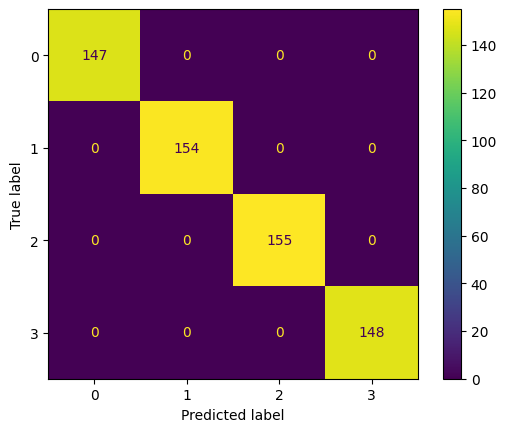

In [1025]:
print('---------train data---------')
cm_train= confusion_matrix(y_train, xgb_train_predict, labels=xgb.classes_)
cm_test= confusion_matrix(y_test, xgb_test_predict, labels=xgb.classes_)
disp= ConfusionMatrixDisplay(cm_train, display_labels=xgb.classes_)
disp.plot()
plt.show()

---------test data---------


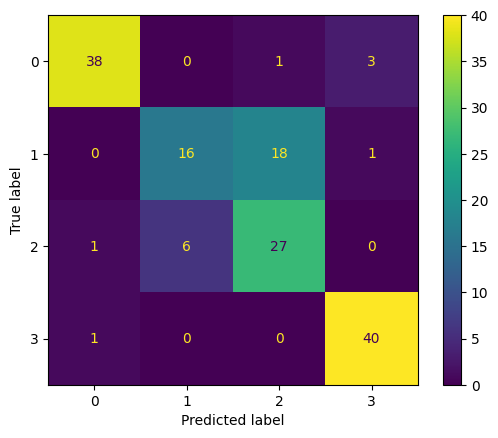

In [1085]:
print('---------test data---------')
disp= ConfusionMatrixDisplay(cm_test, display_labels=xgb.classes_)
disp.plot()
plt.show()

# **AdaBoostClassifier**

In [1086]:
# AdaBoostClassifier
ad= AdaBoostClassifier()
ad.fit(X_train, y_train)
ad_train_predict= ad.predict(X_train)
ad_test_predict= ad.predict(X_test)

In [1087]:
print('AdaBoostClassifier')
print('accuracy_score of train_data :', accuracy_score(y_train, ad_train_predict))
print('accuracy_score of test_data :', accuracy_score(y_test, ad_test_predict))

AdaBoostClassifier
accuracy_score of train_data : 0.6307947019867549
accuracy_score of test_data : 0.625


In [1088]:
print('confusion_matrix of train_data :\n',confusion_matrix(y_train, ad_train_predict))
print('confusion_matrix of test_data :\n',confusion_matrix(y_test, ad_test_predict))
print('---------------------------------------------------------------------')
print('f1_score for train_data :', f1_score(y_train, ad_train_predict, average='weighted'))
print('f1_score for test_data :', f1_score(y_test, ad_test_predict, average='weighted'))

confusion_matrix of train_data :
 [[121  24   2   0]
 [  3  80  67   4]
 [  5  83  66   1]
 [  0  34   0 114]]
confusion_matrix of test_data :
 [[31 10  1  0]
 [ 2 18 15  0]
 [ 1 20 13  0]
 [ 0  7  1 33]]
---------------------------------------------------------------------
f1_score for train_data : 0.6482313205700891
f1_score for test_data : 0.6489685885677922


---------train data---------


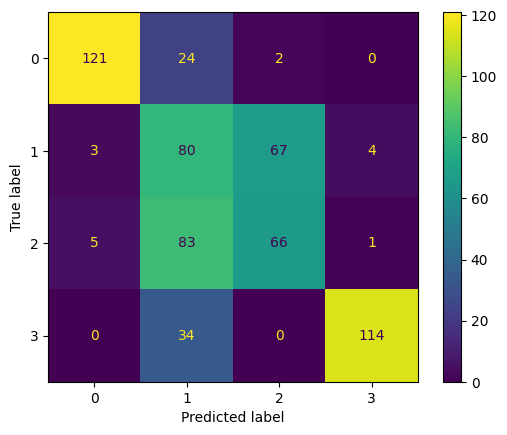

In [1089]:
print('---------train data---------')
cm_train= confusion_matrix(y_train, ad_train_predict, labels=ad.classes_)
cm_test= confusion_matrix(y_test, ad_test_predict, labels=ad.classes_)
disp= ConfusionMatrixDisplay(cm_train, display_labels=ad.classes_)
disp.plot()
plt.show()

---------test data---------


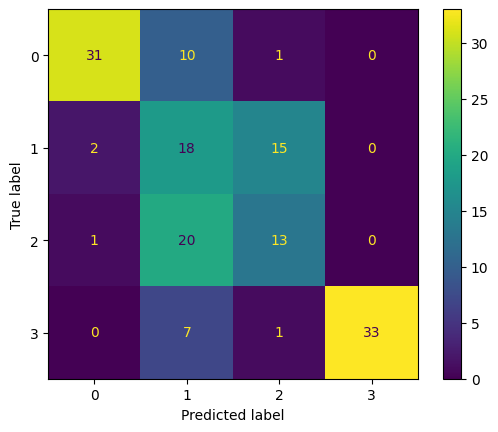

In [1090]:
print('---------test data---------')
disp= ConfusionMatrixDisplay(cm_test, display_labels=ad.classes_)
disp.plot()
plt.show()

# **GradientBoostingClassifier**

In [1091]:
# GradientBoostingClassifier
gbc= GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_train_predict= gbc.predict(X_train)
gbc_test_predict= gbc.predict(X_test)

In [1092]:
print('GradientBoostingClassifier')
print('accuracy_score of train_data :', accuracy_score(y_train, gbc_train_predict))
print('accuracy_score of test_data :', accuracy_score(y_test, gbc_test_predict))

GradientBoostingClassifier
accuracy_score of train_data : 0.9900662251655629
accuracy_score of test_data : 0.8092105263157895


In [1093]:
print('confusion_matrix of train_data :\n',confusion_matrix(y_train, gbc_train_predict))
print('confusion_matrix of test_data :\n',confusion_matrix(y_test, gbc_test_predict))
print('---------------------------------------------------------------------')
print('f1_score for train_data :', f1_score(y_train, gbc_train_predict, average='weighted'))
print('f1_score for test_data :', f1_score(y_test, gbc_test_predict, average='weighted'))

confusion_matrix of train_data :
 [[147   0   0   0]
 [  0 152   2   0]
 [  0   4 151   0]
 [  0   0   0 148]]
confusion_matrix of test_data :
 [[39  0  2  1]
 [ 0 21 13  1]
 [ 0 11 23  0]
 [ 1  0  0 40]]
---------------------------------------------------------------------
f1_score for train_data : 0.9900660170848163
f1_score for test_data : 0.8100777140199781


---------train data---------


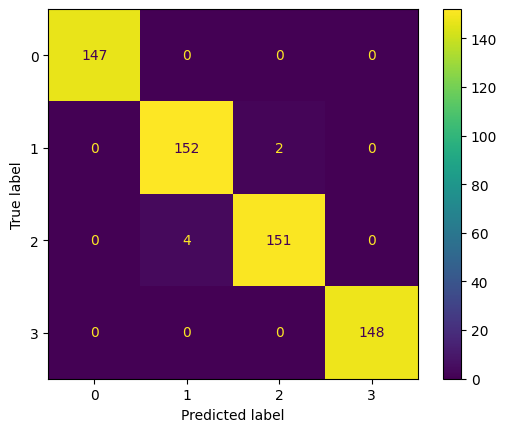

In [1094]:
print('---------train data---------')
cm_train= confusion_matrix(y_train, gbc_train_predict, labels=gbc.classes_)
cm_test= confusion_matrix(y_test, gbc_test_predict, labels=gbc.classes_)
disp= ConfusionMatrixDisplay(cm_train, display_labels=gbc.classes_)
disp.plot()
plt.show()

---------test data---------


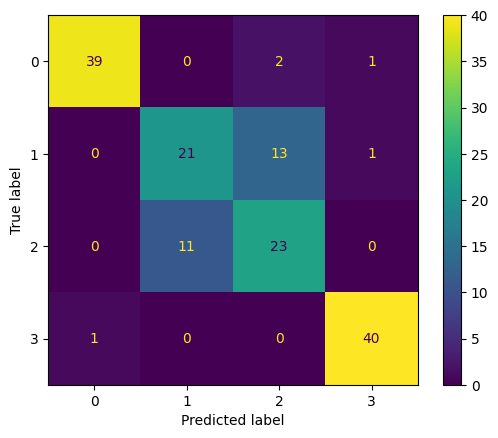

In [1095]:
print('---------test data---------')
disp= ConfusionMatrixDisplay(cm_test, display_labels=gbc.classes_)
disp.plot()
plt.show()

# **Hyper Parameter Tuning**

# **GridsearchCV and RandomizedsearchCV methods apply for RandomforestClassifier**
**in this case two modules are given best accuracy score for test dataset**

**RandomForestClassifier and the another one is XGBClassifier**

In [911]:
# X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=19)
# X_train= ss.fit_transform(X_train)
# X_test= ss.transform(X_test)

In [914]:
# GridSearchCV
rfc= RandomForestClassifier()

param_grid = {
    'criterion':['gini','entropy'],
    'min_samples_split':[2, 4, 6],
    'n_estimators': [25, 50, 100, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9, None],
    'min_samples_leaf': [1, 3, 6],
}
gscv= GridSearchCV(rfc, param_grid= param_grid, cv= 10)
gscv.fit(X_train, y_train)
print(gscv.best_estimator_)


RandomForestClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       min_samples_split=6, n_estimators=25)


In [1036]:
print('GridsearchCV score:', gscv.score(X_test, y_test))

GridsearchCV score: 0.8289473684210527


In [1037]:
# RandomizedSearchCV
rfc= RandomForestClassifier()
rscv= RandomizedSearchCV(rfc, param_distributions= param_grid,cv= 10)
rscv.fit(X_train, y_train)
print(rscv.best_estimator_)

RandomForestClassifier(min_samples_leaf=3, min_samples_split=6,
                       n_estimators=200)


In [1038]:
print('RandomizedSearchCV score:', rscv.score(X_test, y_test))

RandomizedSearchCV score: 0.8289473684210527


# **GridsearchCV and RandomizedsearchCV methods apply for XGBClassifier**

In [1042]:
# RandomizedsearchCV
xgb= XGBClassifier()

params = {
 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}
rscv= RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
rscv.fit(X_train, y_train)
print(rscv.best_estimator_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)


In [1053]:
xgb= XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=5, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None)
xgb.fit(X_train, y_train)
pred= xgb.predict(X_test)
print(accuracy_score(y_test,pred))

0.8289473684210527


# **Final Model**

In [1103]:
final_model= RandomForestClassifier(min_samples_leaf=3, min_samples_split=6, n_estimators=200)
final_model.fit(X_train,y_train)
prediction= final_model.predict(X_test)
print('****test_data****')
print('accuracy_score :',accuracy_score(y_test, prediction))
print('(f1_score for :',f1_score(y_test, prediction, average='weighted'))

****test_data****
accuracy_score : 0.8289473684210527
(f1_score for : 0.8245676974862658


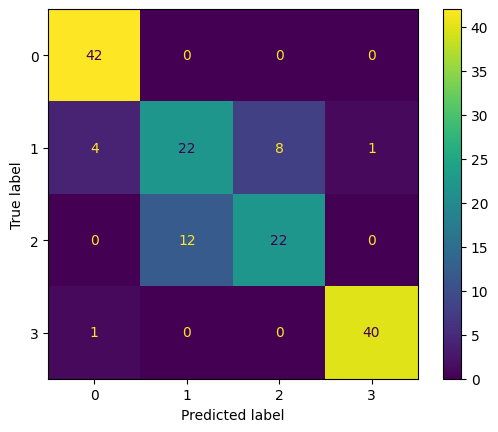

In [1104]:
cm_test= confusion_matrix(y_test, prediction, labels=final_model.classes_)
disp= ConfusionMatrixDisplay(cm_test, display_labels=final_model.classes_)
disp.plot()
plt.show()